In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
# # SciKitLearn is a useful machine learning utilities library
# import sklearn
# # The sklearn dataset module helps generating |datasets
# import sklearn.datasets
# import sklearn.linear_model
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import normalize
# from scipy.stats import gaussian_kde
import pandas as pd
import network as nn

In [2]:
# Import Dataset
qcd_raw = pd.read_csv('../EventPlotting/qcd_outputDataForLearning.csv')
hh_raw = pd.read_csv('../EventPlotting/dihiggs_outputDataForLearning.csv')

In [3]:
qcd_raw.head()
print(len(qcd_raw), "rows of qcd data")
hh_raw.head()
print(len(hh_raw), "rows of dihiggs data")

1703 rows of qcd data
4605 rows of dihiggs data


In [4]:
# Make higgs and qcd sets from raw data
hh_all = hh_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
qcd = qcd_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]

In [5]:
hh_all = np.array(hh_all)
qcd = np.array(qcd)

In [6]:
# add labels to di-higgs
hh_all=hh_all[:,:4]
# print(hh[0:3])
hh_labels= np.zeros((len(hh_all),1))
hh_labels = hh_labels+1
#a = hh[:len(hh)]
# print(a.shape)
hh_all = np.append(hh_all, hh_labels, axis=1)
# print(hh.shape)
# print(hh[0:3])

In [7]:
# add labels to qcd
qcd=qcd[:,:4]
# print(hh[0:3])
qcd_labels= np.zeros((len(qcd),1))
#a = hh[:len(hh)]
# print(a.shape)
qcd = np.append(qcd, qcd_labels, axis=1)
# print(hh.shape)
# print(hh[0:3])
# print(qcd[:4])

In [8]:
# select a quarter of hh events so that the set is half and half
# we shuffle the list first to take a random 1/4. this means we have a different dataset every time
# np.random.seed(0)
# np.random.shuffle(hh_all) 
hh = hh_all[0:len(qcd)]

In [18]:
print(hh[:4])
print(qcd[:4])

[[148.29183647 158.29664593   2.39941158   3.04517197   1.        ]
 [ 96.55363983  58.55460135   1.3437355    1.1183898    1.        ]
 [110.27188042 130.16422715   0.69737734   1.15238492   1.        ]
 [179.64052569 166.13619263   2.05337635   2.09055659   1.        ]]
[[124.32560775 111.57092015   2.30806958   1.8907895    0.        ]
 [ 44.27017863  50.02795445   0.53594587   0.67197657   0.        ]
 [ 26.86431539  97.05075322   0.50002477   1.24722521   0.        ]
 [ 52.99052297  68.4701516    0.85636988   1.41845491   0.        ]]


In [21]:
all_data = np.append(hh[:,:4],qcd[:,:4], axis=0) 
for i in range (8): # shuffle 8 times
    np.random.shuffle(all_data) 
print(all_data[:4])
all_labels = all_data[:,4:]
all_data = all_data[:,:4]
print(all_data[:4])
print(all_labels[:4])
# print(test_data)
print(len(all_data))

[[ 80.50211943  81.97538299   1.43551078   1.38583337]
 [133.06463272  89.16276063   1.79008113   2.46187567]
 [ 86.41124994  34.84323936   1.99437903   1.04567563]
 [111.03610767 137.32202001   2.48948044   2.97938788]]
[[ 80.50211943  81.97538299   1.43551078   1.38583337]
 [133.06463272  89.16276063   1.79008113   2.46187567]
 [ 86.41124994  34.84323936   1.99437903   1.04567563]
 [111.03610767 137.32202001   2.48948044   2.97938788]]
[]
3406


In [24]:
# TODO: Train-Test split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, train_size=0.5, test_size=0.5, random_state=42)
print(len(train_data))
# print(train_data)
print(train_data.shape)


1703
(1703, 4)


In [23]:
learnRate = 0.01 
np.random.seed(0)
model = nn.initialize_parameters(nn_input_dim=4, nn_hdim= 12, nn_output_dim= 2)
model = nn.trainThenTest(model,train_data,train_labels, test_data=test_data, test_labels=test_labels,learning_rate=learnRate,epochs=2101,print_loss=True) # original learning rate is 0.01


ValueError: operands could not be broadcast together with shapes (1703,2) (1703,0) 

In [13]:
nn.plotAccPerEpoch("Title")

Loss length: 2101
Train Accuracy length: 2101
test num len 43


<Figure size 432x288 with 0 Axes>

-0.1996855832655534
-0.1996855832655534


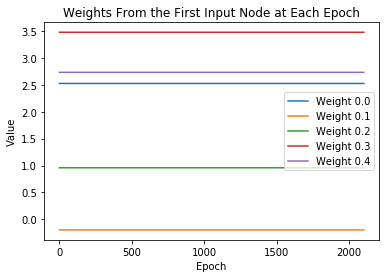

In [14]:
nn.plotSomeWeights()